In [43]:
using LinearAlgebra
using Plots
using CSV, Statistics, LinearAlgebra
using Random,Distributions,SparseArrays,Statistics,Measures,StatsBase

# QUESTION 1

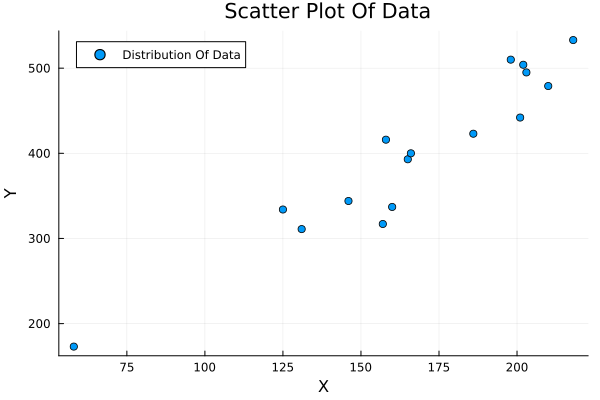

In [44]:
# Data points and uncertainty
x = [203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
sigma_y =[21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22]

# Plotting initial data
plot(x,Y,seriestype=:scatter,label="Distribution Of Data")
title!(" Scatter Plot Of Data")
xlabel!("X")
ylabel!("Y")

In [45]:
# Defining matrix A
A = hcat(ones(length(x)),x)

# Defining Covariance matrix C
N = length(sigma_y)
C = diagm(N,N, 0 => sigma_y.^2)

# Evaluating  X which is column vector [b m] where m is slope and b is intercept of fitted line
X = inv(A'*inv(C)*A)*(A'*inv(C)*Y)
color = [:blue, :magenta]
printstyled("The Intercept Of Line (b) = ",X[1]; color = color[1])
printstyled("\nThe Slope Of Line (m) = ",X[2]; color = color[2])

The Intercept Of Line (b) = 34.047727757542816
The Slope Of Line (m) = 2.239920831631096

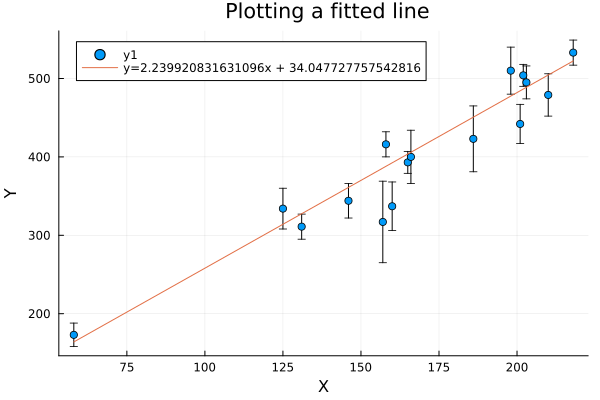

In [46]:
# Plotting fitted data
plot(x,Y,seriestype=:scatter,yerr =sigma_y)
plot!(x,X[2]*x.+X[1] ,label="y="*string(X[2])*"x + "*string(X[1]))
title!(" Plotting a fitted line")
xlabel!("X")
ylabel!("Y")

In [47]:
# The uncertainty in intercept and slope is given by diagonal elements of  inv(A'inv(C)A)
t = inv(A'*inv(C)*A)
color = [:blue, :magenta]
printstyled("The Uncertainity In Intercept Of Line = ",t[1,1]; color = color[1])
printstyled("\nThe Uncertainity In Slope Of Line  = ",t[2,2]; color = color[2])

The Uncertainity In Intercept Of Line = 332.92260104209953
The Uncertainity In Slope Of Line  = 0.011616631123297434

# QUESTION 2

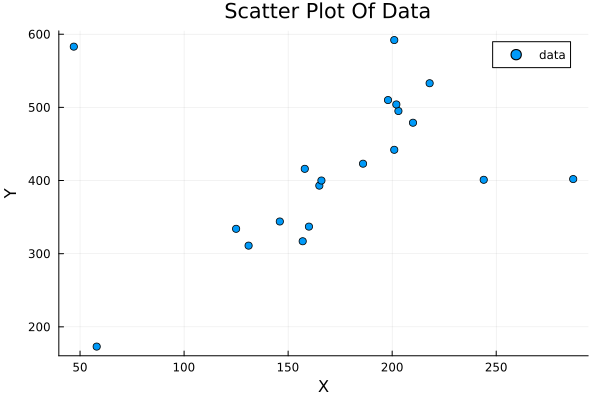

In [48]:
x = [201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
sigma_y =[61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22]

plot(x,Y,seriestype=:scatter,label="data")
title!(" Scatter Plot Of Data")
xlabel!("X")
ylabel!("Y")

In [49]:
# Defining A
A = hcat(ones(length(x)),x)

# Defining Covariance matrix C
N = length(sigma_y)
C = diagm(N,N, 0 => sigma_y.^2)

# Finding X
X = inv(A'*inv(C)*A)*(A'*inv(C)*Y)
color = [:blue, :magenta]
printstyled("The Intercept Of Line (b) = ",X[1]; color = color[1])
printstyled("\nThe Slope Of Line (m) = ",X[2]; color = color[2])

The Intercept Of Line (b) = 213.27349197595913
The Slope Of Line (m) = 1.0767475241683293

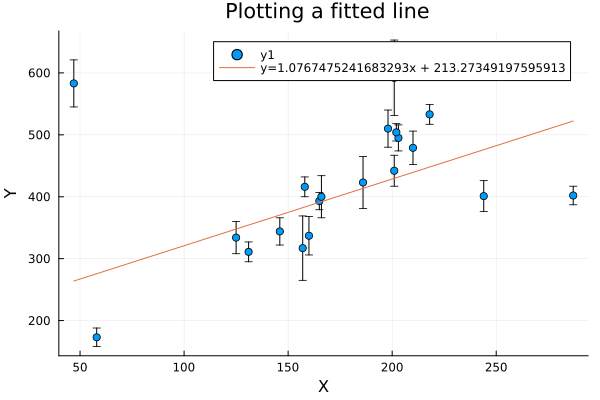

In [50]:
# Plotting fitted data
plot(x,Y,seriestype=:scatter,yerr =sigma_y)
plot!(x,X[2]*x.+X[1] ,label="y="*string(X[2])*"x + "*string(X[1]))
title!(" Plotting a fitted line")
xlabel!("X")
ylabel!("Y")

In [51]:
# The uncertainty in intercept and slope is given by diagonal elements of  inv(A'inv(C)A)
t_1 = inv(A'*inv(C)*A)
color = [:blue, :magenta]
printstyled("The Uncertainity In Intercept Of Line = ",t_1[1,1]; color = color[1])
printstyled("\nThe Uncertainity In Slope Of Line  = ",t_1[2,2]; color = color[2])

The Uncertainity In Intercept Of Line = 207.18818909008178
The Uncertainity In Slope Of Line  = 0.005991810080070381

# The addition of the extra-points seems as outliers in actual data as it increases the randmoness/non-linearity . So, fitting a straight line through the data become difficult.

# QUESTTION 3

In [52]:
x = [203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
sigma_y =[21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22]

xsq = x.^2

# Defining A
A = hcat(ones(length(x)),x,xsq)

# Defining C
N = length(sigma_y)
C = diagm(N,N, 0 => sigma_y)

# Finding X
X = inv(A'*inv(C)*A)*(A'*inv(C)*Y)
color = [:blue, :magenta, :red]
printstyled("The Value Of Coefficent of X^2 = ",X[1]; color = color[1])
printstyled("\nThe Value Of Coefficent of X  = ",X[2]; color = color[2])
printstyled("\nThe Value Of Constant Term (b)  = ",X[3]; color = color[3])

The Value Of Coefficent of X^2 = 81.92857798188925
The Value Of Coefficent of X  = 1.4469035120977196
The Value Of Constant Term (b)  = 0.002719821530298372

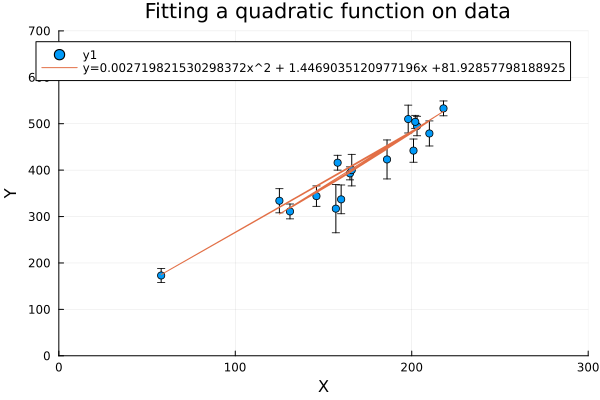

In [53]:
plot(x,Y,seriestype=:scatter,yerr =sigma_y)
plot!(x,X[3]*x.^2 .+X[2]*x .+X[1],label="y="*string(X[3])*"x^2 + "*string(X[2])*"x +"*string(X[1]),ylims=[0,700],xlims=[0,300])
title!(" Fitting a quadratic function on data")
xlabel!("X")
ylabel!("Y")

In [54]:
# # The uncertainty in parameters b,m,q in qx^2+bx+c is given by diagonal elements of  inv(A'inv(C)A)
t_2 = inv(A'*inv(C)*A)
color = [:blue, :magenta, :red]
printstyled("The Uncertainity In Coefficent of X^2 = ",t_2[1,1]; color = color[1])
printstyled("\nThe Uncertainity In Coefficent of X  = ",t_2[2,2]; color = color[2])
printstyled("\nThe Uncertainity In Constant Term (b)  = ",t_2[3,3]; color = color[3])

The Uncertainity In Coefficent of X^2 = 95.77188799640177
The Uncertainity In Coefficent of X  = 0.01994525561089536
The Uncertainity In Constant Term (b)  = 2.37394434720628e-7

# QUESTION 4

Probability distribution for $t_i$ is as follow:
$$ p(t_i | \sigma_{ti}, T) = \frac{1}{\sqrt{2\pi\sigma_{ti}^2}} \exp\left( -\frac{[t_i - T]^2}{2\sigma_{ti}^2} \right). $$
Likelihood is given by equation
$$ \mathcal{L} = \prod_{i=1}^N p(t_i | \sigma_{ti}, T), $$
Applying logarithm on the above expression, we get
$$ \ln \mathcal{L} = K - \sum_{i=1}^N \frac{[t_i - T]^2}{2\sigma_{ti}^2}. $$
where K is a constant.

Now we take derivative of the above expression with respect to $T$ and equate it to zero, in order to find its extremum point:
$$ 0 = \frac{d}{dT} \ln \mathcal{L} = \sum_{i=1}^N \frac{[t_i - T]}{\sigma_{ti}^2}. $$

So, the maximum log likelihood is obtained when:
$$ T = \frac{\sum_{i=1}^N \frac{t_i}{\sigma_{ti}^2}}{\sum_{i=1}^N \frac{1}{\sigma_{ti}^2}}, $$
This also represent the weighted mean.

# QUESTION 5


We have $\chi^2$ as
$$ \chi^2 = [\mathbf{Y} - \mathbf{A} \mathbf{X}]^T \mathbf{C}^{-1} [\mathbf{Y} - \mathbf{A} \mathbf{X}] $$
Taking derivative with respect to $\mathbf{X}$ gives
$$ 0 = \frac{d}{d\mathbf{X}} \chi^2 = -\mathbf{A}^T \mathbf{C}^{-1} [\mathbf{Y} - \mathbf{A} \mathbf{X}] -  [\mathbf{Y} - \mathbf{A} \mathbf{X}]^T \mathbf{C}^{-1} \mathbf{A} $$
or
$$ \mathbf{A}^T \mathbf{C}^{-1} \mathbf{A} \mathbf{X} = \mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y} $$
Solving for $X$ we get
$$ \mathbf{X} = [\mathbf{A}^T \mathbf{C}^{-1} \mathbf{A}]^{-1} [\mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y}] $$


# Pruning outliers
# QUESTION 6
## using the mixture model proposed in research Paper in Section-3

In [64]:
# Defining the data
X = [201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
σy =[61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22];


In [65]:
# Defining A
A = hcat(ones(length(X)),X)

# Defining Covariance matrix C
N = length(sigma_y)
C = diagm(N,N, 0 => sigma_y.^2)

# Finding X
bestfit = inv(A'*inv(C)*A)*(A'*inv(C)*Y) # Best fit for b and m using standard method
color = [:blue, :magenta]
printstyled("The Intercept Of Best Fit Line (b) = ",bestfit[1]; color = color[1])
printstyled("\nThe Slope Of Line (m) = ",bestfit[2]; color = color[2])

The Intercept Of Best Fit Line (b) = 213.27349197595913
The Slope Of Line (m) = 1.0767475241683293

MAP Line
m = 2.245, b = 32.0


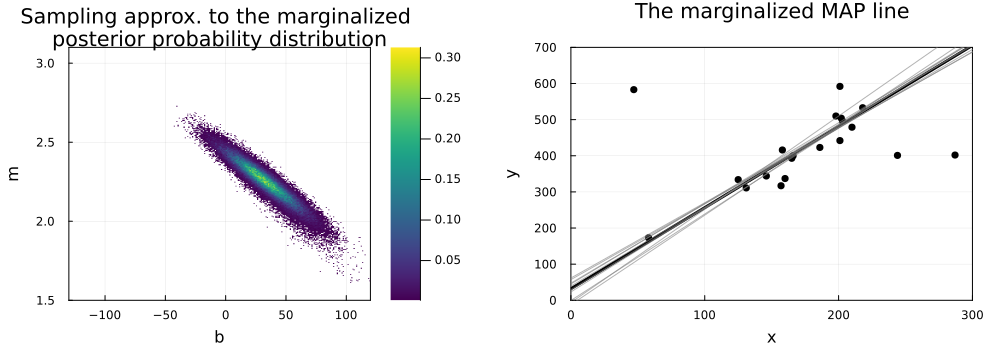

In [74]:
function objective(pars,X,Y,σy)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*σy[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/σy[i]^2)+Pb/sqrt(2*pi*(Vb+σy[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+σy[i]^2))) for i in 1:length(X))#+pars[4]
end


# Defining the metropolis_hastings function

function metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)
initialX = objective(initial_guess,X,Y,σy)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)
    parsigma=[5,0.075,0.01,1,0.1]   # proposal distribution
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        #newsample[3]= rand()
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,X,Y,σy)
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    return bestfit, accepted_samples
end

# Sample
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])#(m,b,Pb,Yb,Vb)
nsample = 2E5  #number of samples to take after burn-in
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)

# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]


#2D histogram
# Best-fit, marginalized
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)

#Data with MAP line and sampling
# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("MAP Line")
println("m = ",bestm,", b = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:viridis,title="Sampling approx. to the marginalized \nposterior probability distribution", xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)

plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,title="The marginalized MAP line",xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,σy=σy,mc=:black)


    
#plot a sampling of 10 lines drawn from the marginalized posterior distribution for (m,b)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)




# QUESTION 7
## plotting the fully marginalized posterior distribution function for parameter Pb.

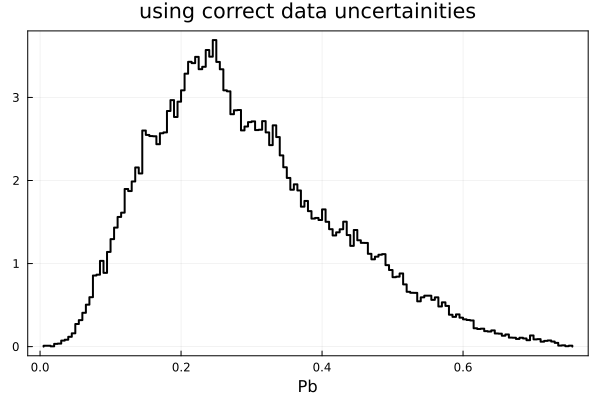

In [75]:
# Plot with marginalization over m, b, Vb, Yb for parameter Pb
histPb = stephist(accepted_Pb, nbins=200,lw=2,c=:black,legend=false,density = true,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using correct data uncertainities",framestyle=:box)

In [79]:
# Defining the data
X = [201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]./2
σy =[61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22];

In [80]:
# Defining A
A = hcat(ones(length(X)),X)

# Defining C
N = length(σy)
C = diagm(N,N, 0 => σy.^2 ./4)

# Finding X
bestfit = inv(A'*inv(C)*A)*(A'*inv(C)*Y) # Best fit for b and m using standard method

2-element Vector{Float64}:
 106.63674598797957
   0.5383737620841647

MAP Line
m = 1.15, b = 12.0


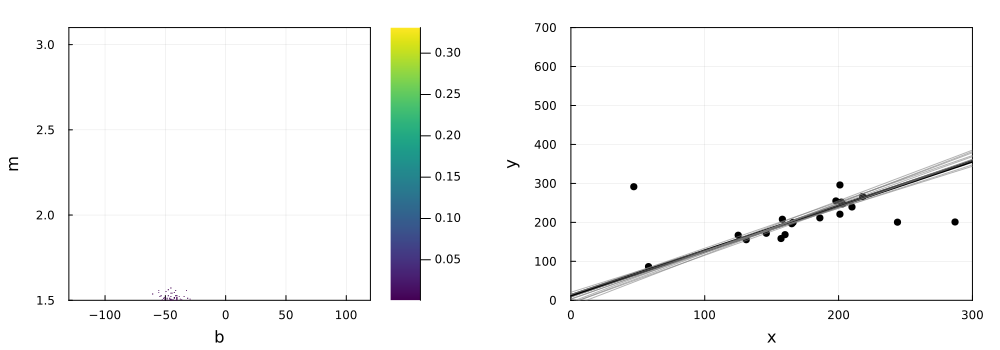

In [81]:
# Defining the objective function

function objective(pars,X,Y,σy)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*σy[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/σy[i]^2)+Pb/sqrt(2*pi*(Vb+σy[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+σy[i]^2))) for i in 1:length(X))#+pars[4]
end


# Defining the metropolis_hastings function

function metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)
initialX = objective(initial_guess,X,Y,σy)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)
    parsigma=[5,0.075,0.01,1,0.1]   # proposal distribution
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        #newsample[3]= rand()
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,X,Y,σy)
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    return bestfit, accepted_samples
end

# Sample
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])#(m,b,Pb,Yb,Vb)
nsample = 2E5  #number of samples to take after burn-in
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)

# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]


#2D histogram
# Best-fit, marginalized
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)

#Data with MAP line and sampling
# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("MAP Line")
println("m = ",bestm,", b = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)

plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,σy=σy,mc=:black)

#plot a sampling of 10 lines drawn from the marginalized posterior distribution for (m,b)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)


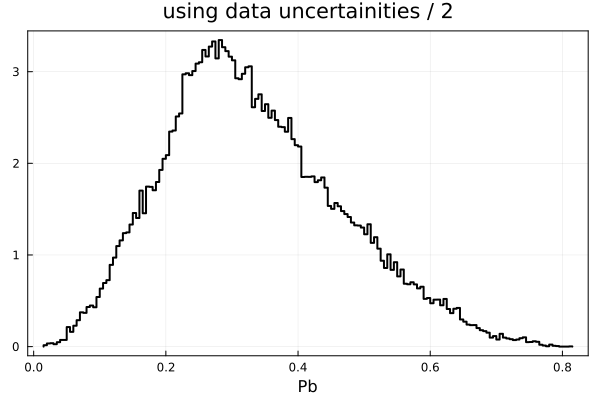

In [82]:
# Plot with marginalization over m, b, Vb, Yb for parameter Pb using data uncertaintities / 2
histPb = stephist(accepted_Pb, nbins=bins,lw=2,c=:black,legend=false,density = true,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using data uncertainities / 2",framestyle=:box)

# Uncertainties in the best-fit parameters
# QUESTION 8
## Jackknife(20 trials) and bootstrap estimates for the uncertainity

In [85]:
using Pandas

[ Info: Installing pandas via the Conda pandas package...
[ Info: Running `conda install -y pandas` in root environment


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\najka\.julia\conda\3\x86_64

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-2.0.1               |  py310h1c4a608_1        10.5 MB  conda-forge
    python-dateutil-2.8.2      |     pyhd8ed1ab_0         240 KB  conda-forge
    python-tzdata-2023.3       |     pyhd8ed1ab_0         140 KB  conda-forge
    pytz-2023.3                |     pyhd8ed1ab_0         182 KB  conda-forge
    six-1.16.0                 |     pyh6c4a22f_0          14 KB  conda-forge
    vc14_runtime-14.34.31931   |      h5081d32_13         710 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        11.7 MB

The following NEW packages will be INSTALLED:

  pandas             conda-forge/win-64::pandas

pandas-2.0.1         | 10.5 MB   | #######9   |  79% 

pandas-2.0.1         | 10.5 MB   | ########   |  80% 

pandas-2.0.1         | 10.5 MB   | ########1  |  81% 

pandas-2.0.1         | 10.5 MB   | ########3  |  83% 

pandas-2.0.1         | 10.5 MB   | ########4  |  85% 

pandas-2.0.1         | 10.5 MB   | ########6  |  87% 

pandas-2.0.1         | 10.5 MB   | ########8  |  89% 

pandas-2.0.1         | 10.5 MB   | #########  |  91% 

pandas-2.0.1         | 10.5 MB   | #########2 |  93% 

pandas-2.0.1         | 10.5 MB   | #########4 |  94% 

pandas-2.0.1         | 10.5 MB   | #########6 |  96% 

pandas-2.0.1         | 10.5 MB   | #########8 |  98% 

pandas-2.0.1         | 10.5 MB   | ########## | 100% 

                                                     
                                                     

                                                     


                                                     



                                                     




     

In [86]:
function standard_fit(data)
    x = Array(data.x)
    Y = Array(data.y)
    sig_y = Array(data.sig_y)
    A = hcat(ones(length(Y)), x)
    C = Diagonal(sig_y .^ 2)

    # standard fit

    X = inv(A' * inv(C) * A) * (A' * inv(C) * Y)

    slope = X[2]
    intercept = X[1]
    slope_uncertainty = sqrt(inv(A' * inv(C) * A)[2, 2])
    intercept_uncertainty = sqrt(inv(A' * inv(C) * A)[1, 1])

    return slope, slope_uncertainty, intercept, intercept_uncertainty

end

data = read_csv("data.csv")

M = 20000
N = length(data.x)

## bootstrap method
m_org = standard_fit(data)[1]
m_vals = []

for i in 1:M
    sample_with_replacement = Pandas.sample(data, N, replace=true)
    m_curr = standard_fit(sample_with_replacement)[1]
    push!(m_vals, m_curr)
end

sigma_m_bootstrap = sum((m_vals .- m_org).^2) / (M)
println("Standard  uncertainty: ", standard_fit(data)[2])
println("Bootstrap uncertainty: ", sigma_m_bootstrap)

## jackknife estimate of uncertainty
m_vals = []

for i in 1:N
    sample_without_i = Pandas.sample(data, N, replace=true, ignore_index=i)
    m_curr = standard_fit(sample_without_i)[1]
    push!(m_vals, m_curr)
end

sigma_m_jackknife = (N - 1) * sum((m_vals .- m_org).^2) / N
println("Jackknife uncertainty: ", sigma_m_jackknife)


Standard  uncertainty: 0.0774067831657561
Bootstrap uncertainty: 0.37390587810346904
Jackknife uncertainty: 6.857962560649225


# QUESTION 9

## The mixture-based outlier model with all inlier points

In [87]:
# Data points and uncertainty
X = [203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
σy =[21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22];

In [88]:
# Defining A
A = hcat(ones(length(X)),X)

# Defining C
N = length(σy)
C = diagm(N,N, 0 => σy.^2)

# Finding X
bestfit = inv(A'*inv(C)*A)*(A'*inv(C)*Y) # Best fit for b and m using standard method

2-element Vector{Float64}:
 34.047727757542816
  2.239920831631096

MAP Line
m = 2.23, b = 35.0


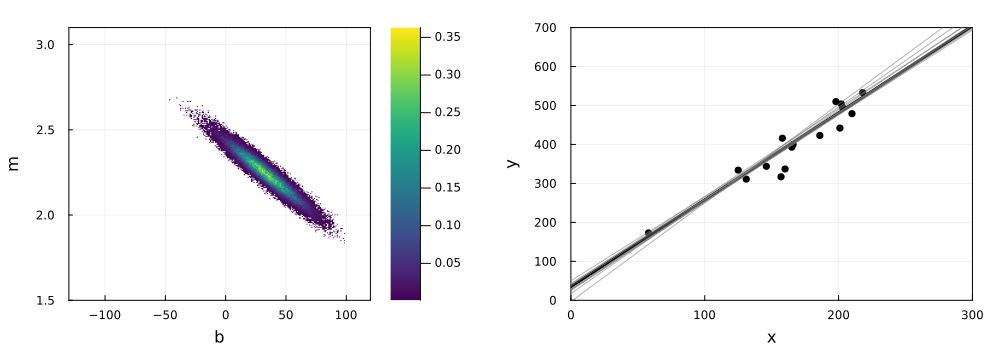

In [89]:
# Defining the objective function

function objective(pars,X,Y,σy)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*σy[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/σy[i]^2)+Pb/sqrt(2*pi*(Vb+σy[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+σy[i]^2))) for i in 1:length(X))#+pars[4]
end


# Defining the metropolis_hastings function

function metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)
initialX = objective(initial_guess,X,Y,σy)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)
    parsigma=[5,0.075,0.01,1,0.1]   # proposal distribution
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        #newsample[3]= rand()
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,X,Y,σy)
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    return bestfit, accepted_samples
end

# Sample
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])#(m,b,Pb,Yb,Vb)
nsample = 2E5  #number of samples to take after burn-in
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)

# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]


#2D histogram
# Best-fit, marginalized
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)

#Data with MAP line and sampling
# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("MAP Line")
println("m = ",bestm,", b = ",bestb)
histbm = histogram2d(accepted_b, accepted_m,nbins=bins, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)

plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,σy=σy,mc=:black)

#plot a sampling of 10 lines drawn from the marginalized posterior distribution for (m,b)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)


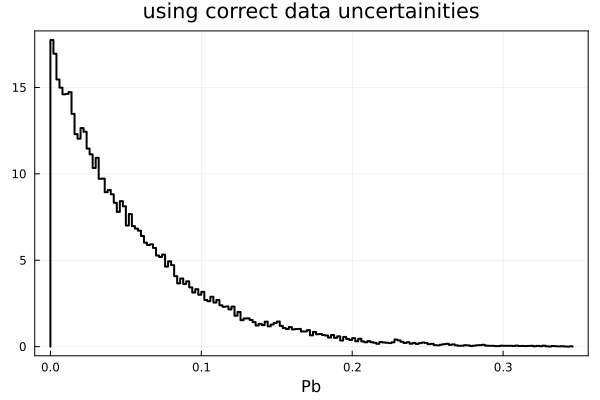

In [90]:
# Plot with marginalization over m, b, Vb, Yb for parameter Pb
histPb = stephist(accepted_Pb, nbins=200,lw=2,c=:black,legend=false,density = true,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using correct data uncertainities",framestyle=:box)

## Inlier points and data uncertainties reduced by 2

In [91]:
# Data points and uncertainty
X = [203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344] ./2
σy =[21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22];

In [92]:
# Defining A
A = hcat(ones(length(X)),X)

# Defining C
N = length(σy)
C = diagm(N,N, 0 => σy.^2 ./4)

# Finding X
bestfit = inv(A'*inv(C)*A)*(A'*inv(C)*Y) # Best fit for b and m using standard method

2-element Vector{Float64}:
 17.023863878771408
  1.119960415815548

In [93]:
# Defining the objective function

function objective(pars,X,Y,σy)
    b = pars[1]
    m = pars[2]
    Pb = pars[3]
    Yb = pars[4]
    Vb = exp(pars[5])
    if (Pb < 0 || Pb > 1)
        return -prevfloat(typemax(Float64))
    end
    return sum(log((1-Pb)/sqrt(2*pi*σy[i]^2)*exp(-0.5*(Y[i]-m*X[i]-b)^2/σy[i]^2)+Pb/sqrt(2*pi*(Vb+σy[i]^2))*exp(-0.5*(Y[i]-Yb)^2/(Vb+σy[i]^2))) for i in 1:length(X))#+pars[4]
end


# Defining the metropolis_hastings function

function metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)
initialX = objective(initial_guess,X,Y,σy)
currentX = initialX
bestX = initialX
bestfit = initial_guess
currentguess = initial_guess
naccept = 0
accepted_samples = []
push!(accepted_samples,currentguess)
    parsigma=[5,0.075,0.01,1,0.1]   # proposal distribution
    for i in 1:(nburn+nsample)
        #Draw a sample from the proposal distribution
        newsample= zeros(5)
        newsample[1]= currentguess[1]+randn()*parsigma[1]
        newsample[2]= currentguess[2]+randn()*parsigma[2]
        #newsample[3]= rand()
        newsample[3]= currentguess[3]+randn()*parsigma[3]
        newsample[4]= currentguess[4]+randn()*parsigma[4]
        newsample[5]= currentguess[5]+randn()*parsigma[5]
        
        #Calculate the objective function for the newsample
        newX = objective(newsample,X,Y,σy)
        u = rand()
        try
            #test = 0.0
            global test = exp(newX-currentX)
        catch error
            test = 2
        end
        if u < test
            #Accept
            currentX = newX
            currentguess = newsample
            naccept = naccept+1
        end
        if currentX > bestX
            bestfit = currentguess
            bestX = currentX
        end
        push!(accepted_samples,currentguess)
    end
    return bestfit, accepted_samples
end

# Sample
initial_guess= ([bestfit[1],bestfit[2],0.0,mean(Y),log(var(Y))])#(m,b,Pb,Yb,Vb)
nsample = 2E5  #number of samples to take after burn-in
nburn = 10000
bestfit,accepted_samples = metropolis_hastings(initial_guess,X,Y,σy,objective,nsample,nburn)

# accepted samples after burn in
samples=reduce(vcat,transpose.(accepted_samples))
samples=samples[setdiff(1:end, (1:nburn),(end)),:]


#2D histogram
# Best-fit, marginalized
accepted_b = samples[:,1]
accepted_m = samples[:,2]
accepted_Pb = samples[:,3]
bins = Int(round(sqrt(nsample)/2))
histbm = fit(Histogram,(accepted_b,accepted_m),nbins=bins)

#Data with MAP line and sampling
# get the position of highest weights which is the most populated bin:
indexi=argmax(histbm.weights)[1]
indexj=argmax(histbm.weights)[2]
bestm = histbm.edges[2][indexj]
bestb = histbm.edges[1][indexi]
println("MAP Line")
println("m = ",bestm,", b = ",bestb)
histbm = histogram2d(good_b, good_m,nbins=bins, c=:viridis, xlabel="b", ylabel="m", xlims = (-130,120), ylims = (1.5,3.1),normalize=:pdf)

plot_lines = plot(xlims=(0,300),ylims=(0,700),legend=false)
plot_lines = plot!(x -> bestm*x + bestb, 0, 300,color = :black, alpha = 1,w=3,xlabel="x",ylabel="y",legend=false)
plot_lines = scatter!(X,Y,σy=σy,mc=:black)

#plot a sampling of 10 lines drawn from the marginalized posterior distribution for (m,b)
for i in 1:10
    ransample = Int(round(rand()*nsample))
    ransample = samples[ransample,1:2]
    mf = ransample[2]
    b  = ransample[1]
    plot_lines = plot!(x -> mf*x + b, 0, 300,color = :gray, alpha = 0.6,w=1,legend=false)
end
plot(histbm,plot_lines,size = (1000, 350),layout = (1,2), margin = 5mm,framestyle=:box)


MAP Line
m = 1.0999999999999999, b = 22.0


LoadError: UndefVarError: good_b not defined

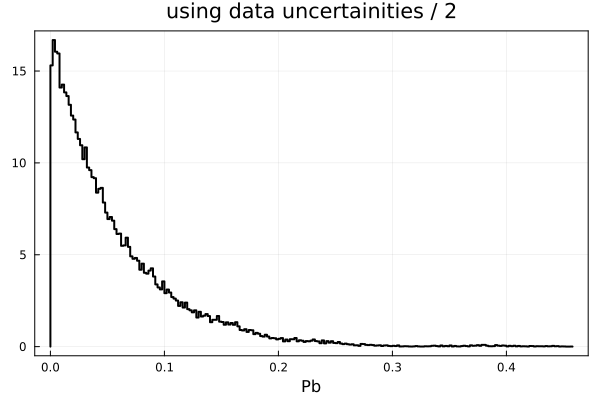

In [94]:
# Plot with marginalization over m, b, Vb, Yb for parameter Pb using data uncertaintities / 2
histPb = stephist(accepted_Pb, nbins=bins,lw=2,c=:black,legend=false,density = true,normalize=:pdf)
plot(histPb,xlabel="Pb", title = "using data uncertainities / 2",framestyle=:box)

# Goodness of the fit for the Non-Gaussian uncertainties
# Question 10

In [95]:
# Data points and uncertainty
X = [203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
σy =[21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22]

# Defining A
A = hcat(ones(length(X)),X)

# Defining C
N = length(σy)
C = diagm(N,N, 0 => σy.^2 )

# Finding X
X = inv(A'*inv(C)*A)*(A'*inv(C)*Y) # Best fit for b and m using standard method

χ2=(Y-A*X)'*inv(C)*(Y-A*X)

println("\nThe Chi^2 for exercise 1 is")
display(χ2)


The Chi^2 for exercise 1 is


18.68076991124081

In [96]:
# Data points and uncertainty
X = [201,244,47,287,203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [592,401,583,402,495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
σy =[61,25,38,15,21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22]

plot(x,Y,seriestype=:scatter,label="data")

# Defining A
A = hcat(ones(length(X)),X)

# Defining C
N = length(σy)
C = diagm(N,N, 0 => σy.^2 )

# Finding X
X = inv(A'*inv(C)*A)*(A'*inv(C)*Y) # Best fit for b and m using standard method

χ2=(Y-A*X)'*inv(C)*(Y-A*X)

println("\nThe Chi^2 for exercise 2 is")
display(χ2)


The Chi^2 for exercise 2 is


289.96372278199925

# QUESTION 11
# The dependence of the fitting scalar chi square on what is assumed about the data uncertainites

In [97]:
function Chi_sq(S,X,Y)

N = length(X)
σy= S*ones(N)

# Defining A
A = hcat(ones(length(X)),X)
    
# Defining C
C = diagm(N,N, 0 => σy )

# Finding X
X = inv(A'*inv(C)*A)*(A'*inv(C)*Y) # Best fit for b and m using standard method

# Finding χ2
χ2=(Y-A*X)'*inv(C)*(Y-A*X)
    
return χ2
end



Chi_sq (generic function with 1 method)

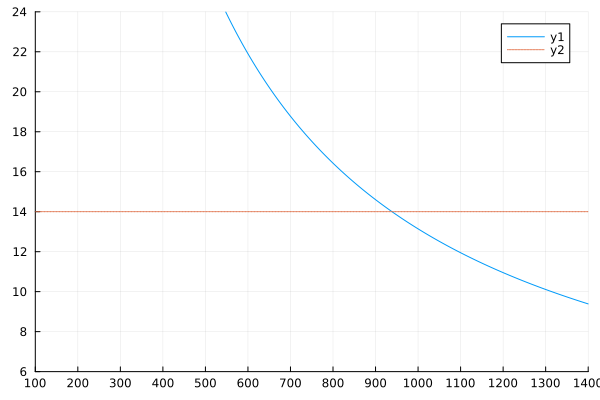


S for which Chi-squared is nearest to 14.0 is:
939.3393393393394
The median of uncertainty variance is 554.5
The mean of uncertainty variance is 739.0625


In [98]:
X = [203,58,210,202,198,158,165,201,157,131,166,160,186,125,218,146]
Y = [495,173,479,504,510,416,393,442,317,311,400,337,423,334,533,344]
σy2 =sort([21,15,27,14,30,16,14,25,52,16,34,31,42,26,16,22] .^2)

median_value =0.5*(σy2[8]+σy2[9])
mean_value =sum(σy2)/16

N=1000
Svals=LinRange(100,1400,N)
Chi_vals=zeros(N)

for i=1:N
S=Svals[i]
Chi_vals[i]=Chi_sq(S,X,Y)
end

p=plot(Svals,Chi_vals,ylim=(6,24),yticks=collect(6:2:24),xlim=(100,1400),xticks=collect(100:100:1400))
plot!(p,Svals,ones(N)*14,linestyle=:dot)
display(p)

println("\nS for which Chi-squared is nearest to 14.0 is:")
S_near= argmin( abs.(Chi_vals .- 14)) #find element nearest to 14
println(Svals[S_near])
println("The median of uncertainty variance is ",median_value)
println("The mean of uncertainty variance is ",mean_value)